In [ ]:
!pip install ultralytics

In [1]:
from PIL import Image
from ultralytics import YOLO
import sys

In [2]:
sys.path.append('../../')

from select_image import select_image

In [3]:
model = YOLO(r'runs\segment\train\weights\best.pt') # 오류 시 필요 패키지 자동 다운로드 후 한 번 더 실행해야 할 수도 있음.

In [4]:
# get image path
# image_path = select_image('test')
image_path = r'../..\Image20230821115521.png'

# Run inference on image
results = model(image_path)  # results list

# Show the results
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
    # im.save('results.jpg')  # save image


image 1/1 c:\Users\jinmo\Documents\GitHub\tp2copy\YOLOv8_segmentation\epochs169_batch64_size640360_count9027\..\..\Image20230821115521.png: 352x640 1 , 1  , 1  , 1 , 1    , 89.6ms
Speed: 1.5ms preprocess, 89.6ms inference, 4.5ms postprocess per image at shape (1, 3, 352, 640)


In [41]:
r.boxes.cls

tensor([2., 4., 7., 1., 6.])

In [43]:
r.masks.data.shape

torch.Size([5, 352, 640])

In [12]:
import torch
import numpy as np
import cv2

In [19]:
seg_image = sum(r.boxes.cls[i] * r.masks.data[i] for i in range(len(r.boxes.cls))).to(torch.uint8)

In [68]:
seg_image.numpy().transpose().shape

(640, 352)

In [72]:
seg_image.unsqueeze(0).shape

torch.Size([1, 352, 640])

In [20]:
seg_image = seg_image.unsqueeze(0).permute(1,2,0).numpy()

In [22]:
seg_image.shape

(352, 640, 1)

In [21]:
cv2.imshow('test', seg_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# import torch
# import torch.nn.functional as F


# # 원하는 축소 비율 설정
# target_height = 360
# target_width = 640

# # 텐서 크기 축소
# resized_tensor = F.interpolate(r.masks.data, size=(target_height, target_width), mode='bilinear', align_corners=False)

# # 결과 출력
# print("원본 텐서 크기:", tensor.shape)
# print("크기 축소된 텐서 크기:", resized_tensor.shape)

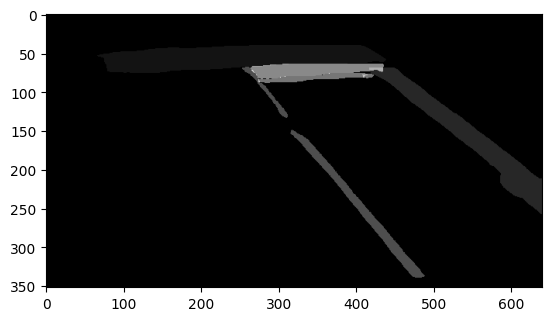

In [49]:
import matplotlib.pyplot as plt

plt.imshow(seg_image, cmap='gray')

In [ ]:
# yolo task=segment mode=predict model='C:\\Users\\jinmo\\Documents\\GitHub\\tp2-copy\\YOLOv8_segmentation\\epochs89_batch64_size640360_count9027\\runs\\segment\\train\\weights\\best.pt' source='https://www.youtube.com/watch?v=puik5KhUjXU' show=True